In [2]:
import pandas as pd, matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
provas = pd.read_excel('provas.xlsx').reset_index().drop(columns={'level_0', 'level_1'})
provas.head()

,DRE,Teste,P1,P1_com_teste,P1_sem_teste,P1_maior_nota,P2,MF,sit
0,116078290,3.0,4.1,7.1,5.125,7.1,4.0,5.55,Prova Final
1,118168669,2.6,5.6,8.2,7.000,8.2,6.6,7.40,Aprovado
2,118144843,3.0,4.8,7.8,6.000,7.8,7.9,7.85,Aprovado
3,118187663,2.5,5.2,7.7,6.500,7.7,8.2,7.95,Aprovado
4,118145297,1.3,2.9,4.2,3.625,4.2,5.3,4.75,Prova Final


A organização do dataframe é a acima. Não incluimos aqui a P3, ainda não realizada. Analisemos alguns de seus dados.

In [4]:
provas.loc[:, 'P1':'MF'].describe()

,P1,P1_com_teste,P1_sem_teste,P1_maior_nota,P2,MF
count,44.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,4.568182,4.011268,3.538732,4.156338,2.512676,3.334507
std,1.840219,3.627929,3.323321,3.668636,3.208156,3.214442
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.550000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.950000,3.600000,4.125000,4.200000,0.000000,2.750000
75%,5.800000,7.600000,6.562500,7.600000,4.700000,5.675000
max,7.400000,10.400000,9.250000,10.400000,10.500000,10.050000


Como se vê, ao final da P2, a média da turma foi de 3,33 e a mediana de 2,75 (isto é, metade da turma tirou abaixo desse valor). O desvio padrão foi de 3,21. Vejamos se o resultado muda consistententemente com a remoção dos desistentes. Consideraremos desistentes aqueles que objetiveram 0 nas duas provas.

In [5]:
provas_guerra = provas.query('(P1_com_teste != "0" & P2 != "0")')
provas_guerra.drop(columns=['DRE']).describe()

,Teste,P1,P1_com_teste,P1_sem_teste,P1_maior_nota,P2,MF
count,30.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,2.400000,4.821212,7.003030,6.026515,7.096970,5.406061,6.251515
std,0.602867,1.695538,2.221695,2.119422,2.128157,2.526601,2.035908
min,1.100000,0.000000,1.100000,0.000000,1.100000,0.200000,0.650000
25%,1.800000,4.100000,6.100000,5.125000,6.400000,3.800000,5.200000
50%,2.600000,5.200000,7.600000,6.500000,7.600000,4.900000,5.800000
75%,2.900000,5.800000,8.300000,7.250000,8.300000,7.500000,7.550000
max,3.000000,7.400000,10.400000,9.250000,10.400000,10.500000,10.050000


A média subiu para 6,25 e o desvio padrão caiu para 2,04! Definitivamente, estávamos em um cenário enganador. Prossigamos eliminando os desistentes.

In [125]:
banco_P3 = 0
banco_rep = 0
for e in provas_guerra['MF']:
    if e < 6:
        banco_P3 += 1
    if e < 3:
        banco_rep +=1
        
(banco_P3, banco_P3/len(provas_guerra), banco_rep, banco_rep/len(provas_guerra))

(17, 0.5151515151515151, 1, 0.030303030303030304)

Aproximadamente 51% da turma está abaixo da média, isto é, é de interesse que recorram à P3. Somente 3% (um único aluno), contudo, estaria diretamente reprovado pelos padrões da UFRJ por obter média inferior a 3. Resta saber o quanto o resultado da P3 mudará o quadro. Seguem abaixo os gráficos abaixo da P1, P2 e média final. 

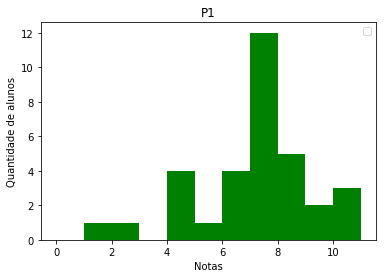

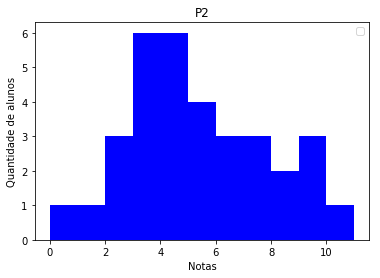

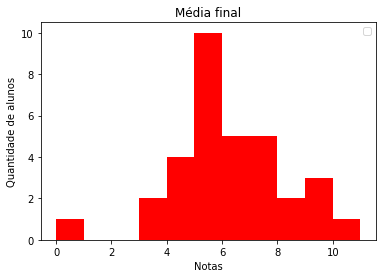

In [7]:
provas_guerra.plot(kind='hist', x='DRE', y='P1_maior_nota', color = 'g', bins=range(0, 12))
plt.title('P1')
plt.xlabel('Notas')
plt.ylabel('Quantidade de alunos')
plt.legend('')
provas_guerra.plot(kind='hist', x='DRE', y='P2', color = 'b', bins=range(0, 12))
plt.title('P2')
plt.xlabel('Notas')
plt.ylabel('Quantidade de alunos')
plt.legend('')
provas_guerra.plot(kind='hist', x='DRE', y='MF', color = 'r', bins=range(0, 12))
plt.title('Média final')
plt.xlabel('Notas')
plt.ylabel('Quantidade de alunos')
plt.legend('')
plt.show()

A comparação torna-se mais fácil com o uso de um gráfico de densidade. Percebemos de início que não houve "arredondamento para a média" considerável, algo comumente registrado. A P1 (curva verde) e a P2 (curva azul) tiveram resultados um pouco divergentes: naquela os alunos foram melhor, com média próxima de 8 e baixo desvio. A P2, em contraste, teve média perto de 6 e um desvio mais acentuado, principalmente para as notas maiores — as curvas se assemelham a uma normal: nesse sentido, a calda direita da P2 é mais pesada que a da P1.

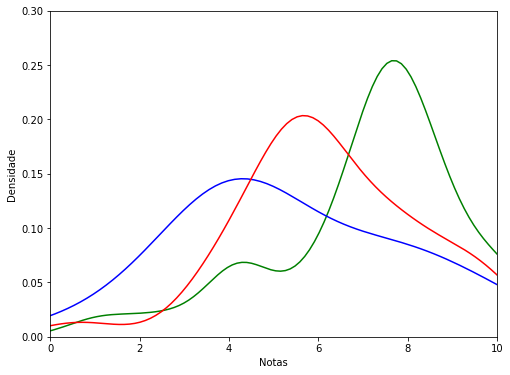

In [8]:
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(provas_guerra['P1_maior_nota'], color='g', hist=False)
sns.distplot(provas_guerra['P2'], color="b", hist=False)
sns.distplot(provas_guerra['MF'], color="r", hist=False)
plt.xlim(0, 10)
plt.ylim(0, 0.3)
plt.xlabel('Notas')
plt.ylabel('Densidade')
plt.show()

Analisemos a situação pós-P3. Ela substitui a menor nota.

In [161]:
p3 = pd.read_excel('p3.xlsx').reset_index().drop(columns={'level_0', 'level_1', 'P1 + teste'}).query('(P1_fin != "0" & P2 != "0")')

In [163]:
no_p3 = p3.groupby('sit_parc')['DRE'].count().reset_index(name='sit_parc_count')
no_p3

,sit_parc,sit_parc_count
0,Aprovado,17
1,Prova Final,16


In [164]:
yes_p3 = p3.groupby('sit_fin')['DRE'].count().reset_index(name='sit_fin_count')
yes_p3

,sit_fin,sit_fin_count
0,Aprovado,27
1,Reprovado,6


A primeira coisa que se nota é a migração de um aluno da situação de "Prova Final" para "Aprovado", provavelmente de algum erro que foi corrigido antes do lançamento das notas da P3. Vemos também que, não contando os desistentes, tivemos 27 aprovados e 6 reprovados (5, após uma correção hoje). Seguem abaixo outras informações.

In [191]:
#Taxa de reprovação em porcentagem
tx = yes_p3['sit_fin_count'][1]/len(p3) * 100

#Quantos alunos ficaram de P3 e reprovaram? Qual a participação deles, em porcentagem, nos que ficaram de P3?
naodeu = p3.query('(sit_parc == "Prova Final" & sit_fin == "Reprovado")').count()['DRE']
naodeu100 = naodeu / p3.query('sit_parc == "Prova Final"').count()['DRE'] * 100

#Quantos alunos perderam nota por não fazerem a P3?
piorou = p3.query('MF_parc > MF_fin').count()['DRE']

(tx, naodeu, naodeu100, piorou)

(18.181818181818183, 6, 37.5, 4)